# Effect of the temporal laser pulse asymmetry on pair production processes during intense laser- electron scattering

C I Hojbota _et al_ 2018 Plasma Phys. Control. Fusion __60__ 064004  https://iopscience.iop.org/article/10.1088/1361-6587/aabaac

Results reproduced by: Óscar Amaro

[1] Positron yield scaling law analysis following: Blackburn _et al_ Phys. Rev. A 96, 022128 (2017) https://journals.aps.org/pra/abstract/10.1103/PhysRevA.96.022128

[2] $a_{0,\mathrm{eff}}$ analysis following: Óscar Amaro and Marija Vranic 2021 New J. Phys. 23 115001, https://iopscience.iop.org/article/10.1088/1367-2630/ac2e83

See also https://github.com/RePlasma/PhysRevA_96_022128

The laser pulse wavelength is 0.8 micron, the duration is 42 fs and the focused transverse profile has a cos^2 shape

The laser intensity has the   


The electron beam has a uniform cylindrical profile with radius 0.5 μm (smaller than the spotsize of 5 micron) and length of 3 μm (9 fs, which is smaller than the pulse duration).

Q = 4.3pC \
Ne = 4.3e-12 /(1.602e-19) ~2.7e7 particles

### Notes
For this geometry ($R \ll W_0$ and $L \ll z_R$)
```
zR (W0=3.2micron) = 40.21238596594935 micron
zR (W0=5micron) = 98.17477042468103 micron
```

so the PW assumption ($dN/da=\delta(a-a_0)$) should work well (see [2])

For Figure 3, this assumption + N+ scaling law overestimates N+, but for Figure 6 it is close to the values in the paper.

In [1]:
import pwpp
from pwpp import *

In [2]:
Ne = 2.7e7 #[] total number of electrons in the colliding beam
lbd = 0.8 #[micron]
tau = 42 #[fs]
w0 = 2*pi*c/(lbd*1e-6)*hbar/e*1e-9; #[GeV] laser frequency in GeV
n = tau*c/(lbd*1e-6)*1e-15; #[] number of laser periods within the laser envelope
# a0 = 0.855 * sqrt(I18) * lbd #LP laser

# definitions in section 3.1 of the text
wfwhm = 5; #[\mu m]
rmax = 2*wfwhm/pi; #[\mu m]
L = 3; #[\mu m]
R = 0.5; #[\mu m]

def a0eff(r):
    """ effective laser field with transverse focusing """
    return a0*cos(r/rmax)**2 * np.heaviside(wfwhm-r,0.5)

# Figure 3

Here the scaling law applied to a PW overestimates the number of positrons

In [16]:
IWcm = 3.5e22
a0 = 0.855 * sqrt(IWcm*1e-18) * lbd #LP laser
Npfig3 = np.array([Np(4/m_GeV, a0, w0, n)[0],Np(5/m_GeV, a0, w0, n)[0],Np(6/m_GeV, a0, w0, n)[0]]) * Ne*1e-7
print(a0)
print("chi_0 =", np.array([4/m_GeV,5/m_GeV,6/m_GeV]) * a0 * 2/329458 )
print("N+ total =", Npfig3 )

127.96468262766881
chi_0 = [6.08079056 7.6009882  9.12118584]
N+ total = [1.97045816 3.3017527  4.81419164]


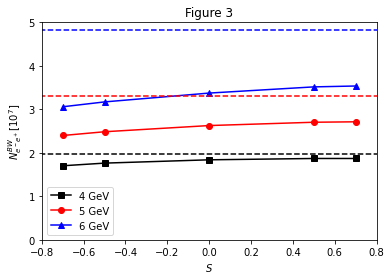

In [31]:
# data from the paper extracted using WebplotDigitizer
Slst = [-0.7,-0.5,0,+0.5,+0.7]
xlst = np.linspace(-1,+1)
Np6GeV = [3.058943089430894, 3.170731707317073, 3.373983739837398, 3.516260162601626, 3.536585365853658]
Np5GeV = [2.3983739837398366, 2.4847560975609766, 2.627032520325203, 2.7032520325203246, 2.713414634146341]
Np4GeV = [1.7022357723577226, 1.763211382113822, 1.8394308943089417, 1.8699186991869903, 1.869918699186992]
plt.plot(Slst,Np4GeV,'ks-', label=r'4 GeV')
plt.plot(Slst,Np5GeV,'ro-', label=r'5 GeV')
plt.plot(Slst,Np6GeV,'b^-', label=r'6 GeV')
plt.plot(xlst, xlst*0 + Npfig3[0], 'k--')
plt.plot(xlst, xlst*0 + Npfig3[1], 'r--')
plt.plot(xlst, xlst*0 + Npfig3[2], 'b--')
plt.legend()
plt.xlim([-0.8,+0.8])
plt.ylim([0,5])
plt.xlabel(r'$S$')
plt.ylabel(r'$N_{e^-e^+}^{BW}[10^7]$')
plt.title(r'Figure 3')
plt.show()

# Figure 6

Here the scaling law applied to a PW reproduces well the number of positrons

In [33]:
IWcm = 3.5e23
a0 = 0.855 * sqrt(IWcm*1e-18) * lbd #LP laser
Npfig6 = np.array([Np(5/m_GeV, a0, w0, n)[0],Np(7.5/m_GeV, a0, w0, n)[0],Np(10/m_GeV, a0, w0, n)[0]]) * Ne*1e-8
print(a0)
print("chi_0 =", np.array([5/m_GeV,7.5/m_GeV,10/m_GeV]) * a0 * 2/329458 )
print("N+ total =", Npfig6 )

404.65985716401383
chi_0 = [24.03643519 36.05465278 48.07287038]
N+ total = [1.50643154 2.4945737  3.44674109]


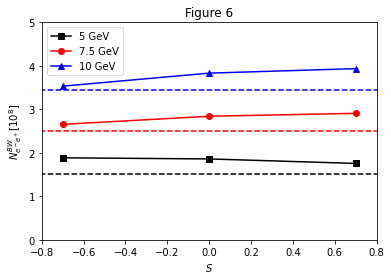

In [36]:
# data from the paper extracted using WebplotDigitizer
Slst = [-0.7,0,+0.7]
xlst = np.linspace(-1,+1)
Np10GeV = [3.5330578512396684, 3.832644628099173, 3.9359504132231393]
Np75GeV = [2.6549586776859497, 2.8409090909090904, 2.9080578512396684]
Np05GeV = [1.885330578512396, 1.8595041322314043, 1.7561983471074378]
plt.plot(Slst,Np05GeV,'ks-', label=r'5 GeV')
plt.plot(Slst,Np75GeV,'ro-', label=r'7.5 GeV')
plt.plot(Slst,Np10GeV,'b^-', label=r'10 GeV')
plt.plot(xlst, xlst*0 + Npfig6[0], 'k--')
plt.plot(xlst, xlst*0 + Npfig6[1], 'r--')
plt.plot(xlst, xlst*0 + Npfig6[2], 'b--')
plt.legend()
plt.xlim([-0.8,+0.8])
plt.ylim([0,5])
plt.xlabel(r'$S$')
plt.ylabel(r'$N_{e^-e^+}^{BW}[10^8]$')
plt.title(r'Figure 6')
plt.show()

# Confirm PW assumption

In [9]:
Nsmpl = int(1e7);
# distribution along z optical axis is flat, so we can concentrate on the uniform radial transverse distribution
rdist = R * sqrt(rng.random(Nsmpl))
# calculate a
nbins = 400; #[]
abins = np.linspace(0.9*a0,0.99999*a0,nbins); #[]
da = abins[1]-abins[0]; #[]
# get histograms
adist = a0eff(rdist);
adist_y,adist_x = np.histogram(adist,abins)
adist_y, adist_x = adist_y, arraycenter(adist_x)

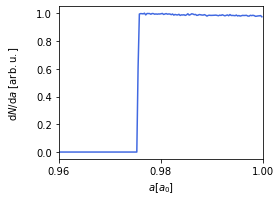

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
plt.plot(adist_x/a0, adist_y/np.max(adist_y), '-', color='royalblue');
plt.xlabel(r'$a[a_0]$')
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}a ~[\mathrm{arb. u.}]$',labelpad=15)
plt.xlim([0.96,1])
plt.xticks([0.96, 0.98, 1.0])
# aspect
axes.set_box_aspect(aspect=3/4)
# final
plt.tight_layout()
plt.show()